In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import matplotlib.ticker as mtick

In [2]:
stack = pd.read_csv('survey_results_public.csv')

#Chosen variables
df = stack[['Country', 'ConvertedComp', 'DevType', 'JobSat', 'LanguageWorkedWith']]

#Drop duplicates
df = df.drop_duplicates()

### Which were the most used programming languages in 2020?

In [3]:
def dummy_array(df, col_list):
    '''
    The columns in col_list must have each observation as an array with the elements separated by ';' 
    Creates dummy columns for each variable in col_list
    Removes the original columns
    Chooses if create a variable for the Nan values in dummy_na
    '''

    #Create a dummy variable for each language or devtype
    for item in col_list:
        split = df[item].str.strip('[]').str.split('\s*;')
        dummy = (split.explode().str.get_dummies().sum(level=0).add_prefix(item + '_'))
        df = df.drop([item], 1).join([dummy])
    
    return df

In [4]:
def split_survey_string (dataset, col_name, sep_type):
    '''
    It gets a column with an array-like value. 
    Separates all the single values in the array and appends it to a list iterating trough all the rows in the dataset
    '''
    
    
    #Order values by count, rename columns and split strings
    temp = dataset[col_name].value_counts().reset_index()
    temp.rename(columns = {'index': 'method', col_name:'count'}, inplace = True)
    temp['method'] = temp['method'].str.split(sep_type)
    
    #Create a list with all separated values
    val_list = []
    for i in range(temp.shape[0]):
        for j in temp['method'][i]:
            val_list.append(j)
    
    #Convert list to series
    series = pd.Series(val_list)
    
    return series

In [5]:
language_split = split_survey_string (df, 'LanguageWorkedWith', ';')
ratio = (language_split.value_counts()/df.shape[0])

In [6]:
#Plot top programming languages
def print_percentage_top(series, top_num, title):
    
    temp = series.head(top_num)
    
    plt.figure(figsize = [11.69, 8.27])
    base_color = 'cornflowerblue'
    ax = sb.barplot(temp.index, temp.values, color = base_color)
    plt.title(title, fontsize = 18, loc = 'left', pad = 20)
    

    #Remove plot frame
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    #Draw y grid below the bars
    ax.set_axisbelow(True)
    ax.grid(axis='y')

    #Introducte percentages
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate( f'{height:.1%}', (x + width/2, y + height*1.02), ha='center')

    return ax

C:\Users\rvile\anaconda3\envs\blogpost\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


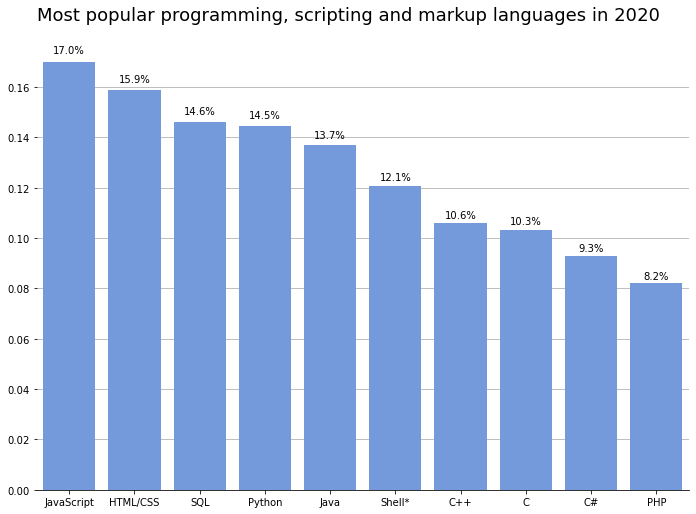

In [7]:
#Plot top 10 programming languages in 2020
ax = print_percentage_top(ratio, 10, 'Most popular programming, scripting and markup languages in 2020')
#Change the 5th label to fit properly in the plot
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[5] = 'Shell*'
ax.set_xticklabels(labels)

plt.show()

C:\Users\rvile\anaconda3\envs\blogpost\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


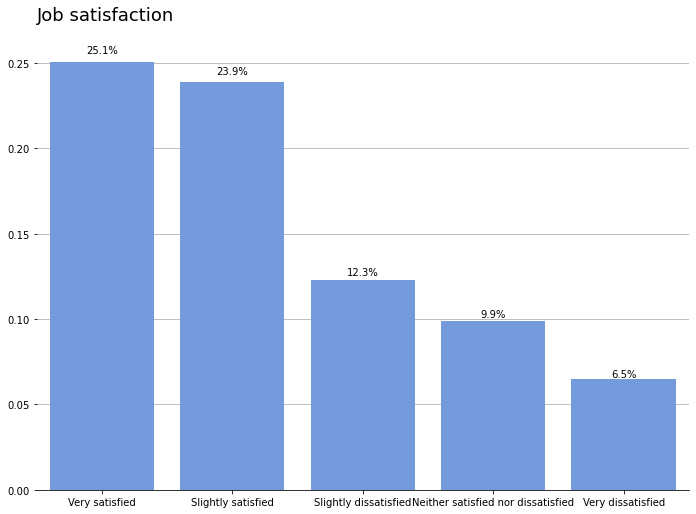

In [9]:
ratio1 = (df.JobSat.value_counts()/df.JobSat.shape[0])
ax1 = print_percentage_top(ratio1, 6, title = 'Job satisfaction')
plt.show()

### What type of programmer had the highest salary?

C:\Users\rvile\anaconda3\envs\blogpost\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


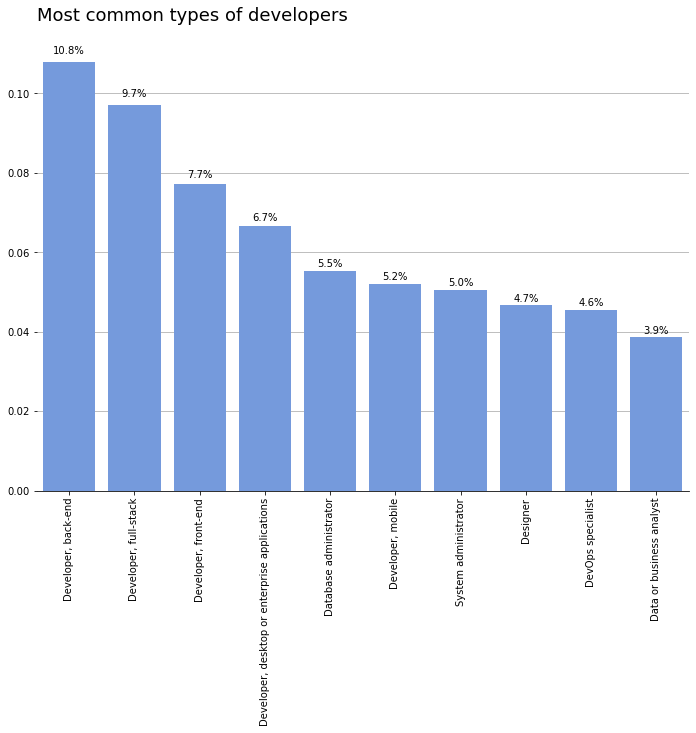

In [10]:
dev_split = split_survey_string (df, 'DevType', ';')
ratio2 = (dev_split.value_counts()/dev_split.shape[0])

ax = print_percentage_top(ratio2, 10, 'Most common types of developers')
plt.xticks(rotation='vertical')
plt.show()

In [11]:
split = split_survey_string(df, 'DevType', ';')
list_unique = split.unique()

In [12]:
df = dummy_array(df, ['DevType'])
df

,Country,ConvertedComp,JobSat,LanguageWorkedWith,DevType_Academic researcher,DevType_Data or business analyst,DevType_Data scientist or machine learning specialist,DevType_Database administrator,DevType_Designer,DevType_DevOps specialist,...,"DevType_Developer, mobile",DevType_Educator,"DevType_Engineer, data","DevType_Engineer, site reliability",DevType_Engineering manager,DevType_Marketing or sales professional,DevType_Product manager,DevType_Scientist,DevType_Senior executive/VP,DevType_System administrator
0,Germany,NaN,Slightly satisfied,C#;HTML/CSS;JavaScript,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,United Kingdom,NaN,Very dissatisfied,JavaScript;Swift,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Russian Federation,NaN,NaN,Objective-C;Python;Swift,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albania,NaN,Slightly dissatisfied,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,United States,NaN,NaN,HTML/CSS;Ruby;SQL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64449,Saudi Arabia,NaN,NaN,NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
64451,Poland,NaN,NaN,NaN,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64453,Thailand,NaN,NaN,C++;HTML/CSS,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
64457,Morocco,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
appended_data = []
list_columns = []
for item in list_unique:
    col_name = 'DevType_' + item
    data = df[df[col_name] == 1]
    data['DevType'] = item
    appended_data.append(data)
    list_columns.append(col_name)

<ipython-input-13-5612e6e0dc37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DevType'] = item
<ipython-input-13-5612e6e0dc37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DevType'] = item
<ipython-input-13-5612e6e0dc37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [14]:
appended_data = pd.concat(appended_data)

In [15]:
df_clean = appended_data[['Country', 'ConvertedComp', 'DevType', 'JobSat']]

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156175 entries, 0 to 64401
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country        156175 non-null  object 
 1   ConvertedComp  109086 non-null  float64
 2   DevType        156175 non-null  object 
 3   JobSat         141213 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.0+ MB


In [17]:
not_var = ['Engineering manager',   'Scientist', 'Senior executive/VP', 'Product manager', 'Educator',
       'Engineer, site reliability', 'Marketing or sales professional']

for i in range(len(not_var)):
    var = not_var[i]
    df_clean = df_clean[df_clean['DevType'] != var]

In [18]:
rename_map = {'Developer, full-stack': 'Full-stack developer', 'Developer, back-end': 'Back-end developer',
               'Developer, front-end': 'Front-end developer', 'Developer, mobile': 'Mobile developer',
               'Developer, desktop or enterprise applications': 'Desktop developer',
               'Developer, embedded applications or devices': 'Embedded developer',
               'Data scientist or machine learning specialist': 'Data scientist',
               'Developer, QA or test': 'QA or test developer', 'Data or business analyst': 'Data analyst',
               'Engineer, data':'Data engineer', 'Developer, game or graphics': 'Game or graphics developer'}

In [19]:
df_clean['DevType'] = df_clean['DevType'].replace(rename_map)


In [20]:
def customPlot(country, response, row, col, color):
    
    '''
    It creates a grid plot of 2x2 differenciating by countries and showing the median of each type of developer if 
    the response is the salary, or else, it shows the mean.
    '''
    
    temp = df_clean[df_clean['Country'] == country]
    
    if response == 'ConvertedComp':
        temp_flat = temp.groupby(['DevType']).median()[response].sort_values(ascending = True)
        
    else: 
        temp_flat = temp.groupby(['DevType']).mean()[response].sort_values(ascending = True)

    x = temp_flat
    y = temp_flat.index
    
    #Plot and title
    ax[row, col].barh(y, x, color=color)
    ax[row, col].set_title(country, loc = 'left', fontsize = 14, pad = 20)

    #Remove plot frame
    ax[row, col].spines['top'].set_visible(False)
    ax[row, col].spines['right'].set_visible(False)
    ax[row, col].spines['left'].set_visible(False)
    ax[row, col].spines['bottom'].set_visible(False)

    #Draw y grid below the bars
    ax[row, col].set_axisbelow(True)
    ax[row, col].grid(axis='x')
    
    #Xticks location ConvertedComp
    if response == 'ConvertedComp':
        
        if temp_flat.max() > 100000:
            ax[row, col].set_xticks(np.arange(0, temp_flat.max(), 30000))

        elif temp_flat.max() > 55000 and temp_flat.max() < 100000:
            ax[row, col].set_xticks(np.arange(0, temp_flat.max(), 20000))

        elif temp_flat.max() > 30000 and temp_flat.max() < 55000:
            ax[row, col].set_xticks(np.arange(0, temp_flat.max(), 15000))

        else:
            ax[row, col].set_xticks(np.arange(0, temp_flat.max(), 5000))
    else:
        pass


    #Introduce dollar symbol
    if response == 'ConvertedComp':
        
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax[row, col].xaxis.set_major_formatter(tick)
        
    else:
        pass

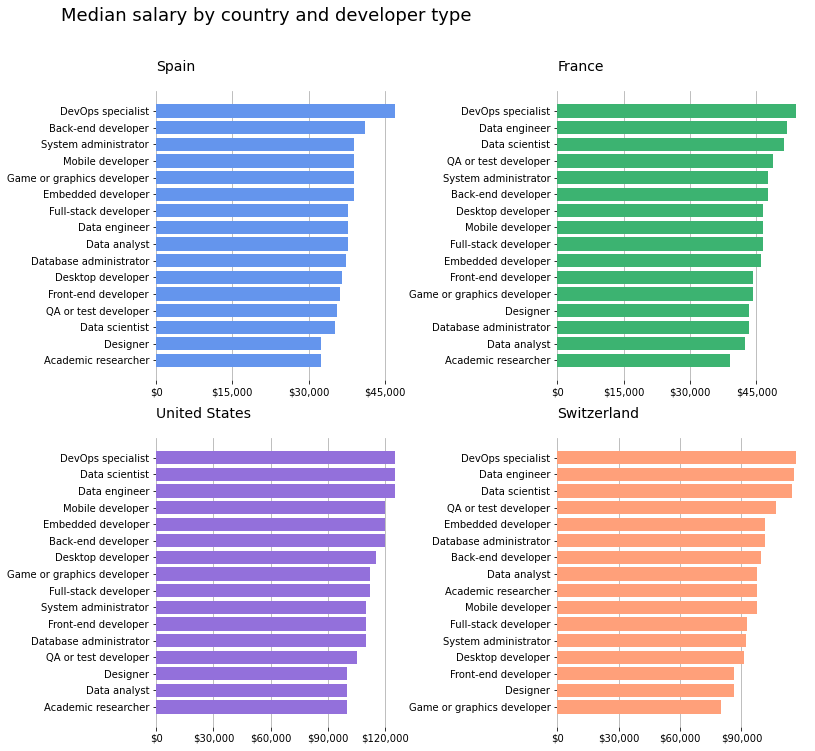

In [28]:
fig, ax = plt.subplots(2, 2)
fig.set_figheight(11.69)
fig.set_figwidth(11.69)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace= 0.2)

fig.suptitle('Median salary by country and developer type', ha = 'right', fontsize = 18)

customPlot('Spain', 'ConvertedComp', 0, 0, 'cornflowerblue')
customPlot('France', 'ConvertedComp', 0, 1, 'mediumseagreen')
customPlot('United States', 'ConvertedComp', 1, 0, 'mediumpurple')
customPlot('Switzerland', 'ConvertedComp', 1, 1, 'lightsalmon')

plt.show()

### What type of programmer had the highest job satisfaction? 

In [22]:
scale_mapper = {'Very dissatisfied':1, 'Slightly dissatisfied':2, 'Neither satisfied nor dissatisfied':3,
               'Slightly satisfied':4, 'Very satisfied':5}
df_clean['JobSat'] = df_clean['JobSat'].replace(scale_mapper)

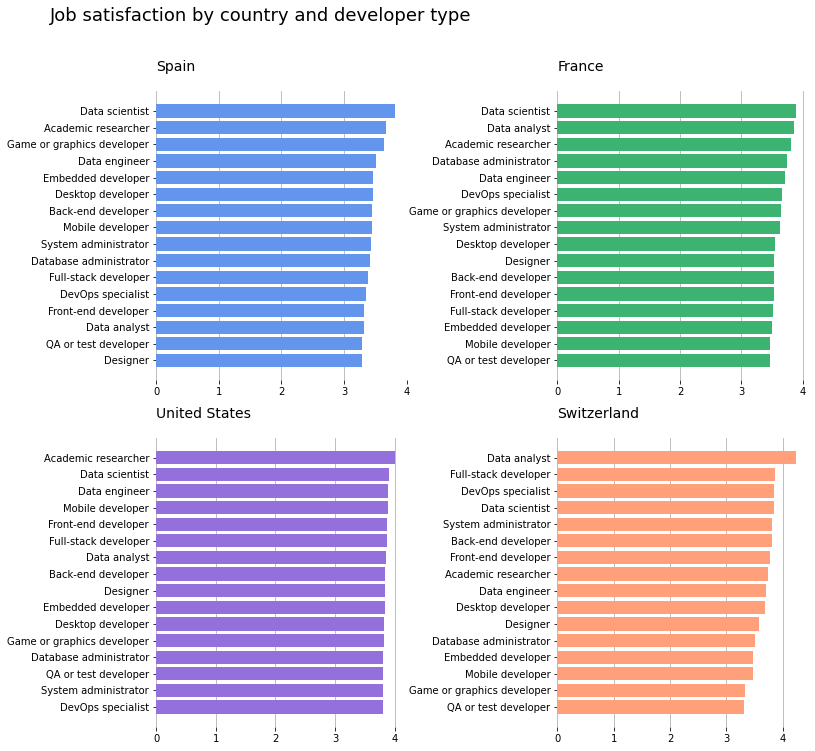

In [23]:
fig, ax = plt.subplots(2, 2)
fig.set_figheight(11.69)
fig.set_figwidth(11.69)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace= 0.2)

fig.suptitle('Job satisfaction by country and developer type', ha = 'right', fontsize = 18)


customPlot('Spain','JobSat', 0, 0, 'cornflowerblue')
customPlot('France','JobSat', 0, 1, 'mediumseagreen')
customPlot('United States','JobSat', 1, 0, 'mediumpurple')
customPlot('Switzerland','JobSat', 1, 1, 'lightsalmon')


plt.show()

C:\Users\rvile\anaconda3\envs\blogpost\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


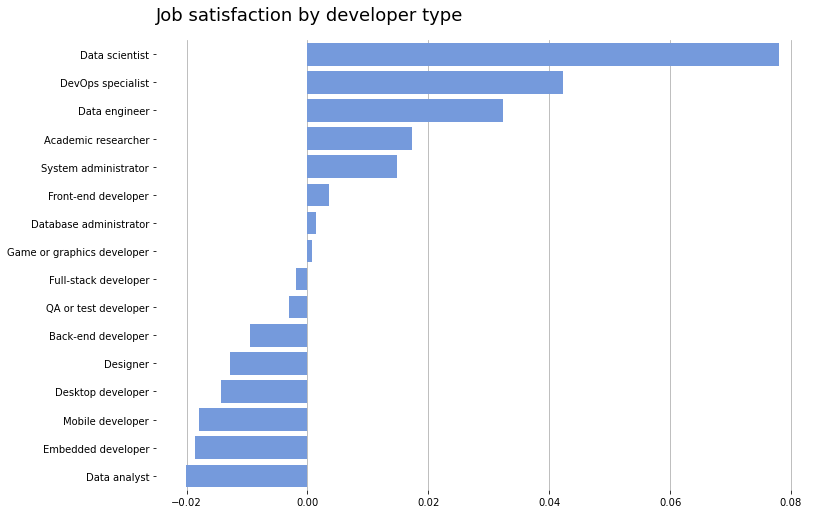

In [24]:
temp_flat = df_clean.groupby(['DevType']).mean()['JobSat'].sort_values(ascending = False)

fig = plt.figure(figsize = [11.69, 8.27])
ax = fig.add_axes([.125, .125, .775, .755])

x = (temp_flat - df_clean['JobSat'].mean())/df_clean['JobSat'].std()
y = temp_flat.index

sb.barplot(x, y, color = 'cornflowerblue', errwidth = 0, ax = ax).set(xlabel = None, ylabel = None)

plt.title('Job satisfaction by developer type', loc = 'left', fontsize = 18, pad = 20)


#Remove plot frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Draw y grid below the bars
ax.set_axisbelow(True)
ax.grid(axis='x')

plt.show()

In [25]:
df_clean['JobSat'].mean()

3.6281349360217137

In [26]:
df_clean['JobSat'].std()

1.3065469810550137

In [27]:
df_clean[df_clean['Country'] == 'United States']['ConvertedComp'].median()

115000.0